In [5]:
import pandas as pd
import csv
import json
import numpy as np
from census import Census
import requests
from us import states
from api_key import weather_key
import matplotlib.pyplot as plt
import scipy.stats as sts

In [6]:
#call on spring accident file
file_path = 'spring_accidents.csv'

spring_accidents = pd.read_csv(file_path)
spring_accidents.head()

,Date,Time,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,2019-05-29,12:19:25,2019-05-29 12:19:25,34.696480,-85.569298,Valley Head,AL,2019-05-29 12:15:00,89.0,89.0,10.0,WSW,15.0,0.0,Fair
1,2019-05-26,12:12:05,2019-05-26 12:12:05,40.690338,-95.782410,Percival,IA,2019-05-26 12:15:00,73.0,73.0,10.0,SSE,3.0,0.0,Mostly Cloudy
2,2019-05-09,02:52:36,2019-05-09 02:52:36,40.757980,-95.819359,Percival,IA,2019-05-09 02:55:00,40.0,31.0,10.0,NNW,17.0,0.0,Cloudy
3,2019-05-09,02:44:47,2019-05-09 02:44:47,40.822060,-95.807648,Thurman,IA,2019-05-09 02:35:00,40.0,31.0,10.0,NW,17.0,0.0,Cloudy
4,2019-05-09,02:41:42,2019-05-09 02:41:42,40.825241,-95.806221,Thurman,IA,2019-05-09 02:35:00,40.0,31.0,10.0,NW,17.0,0.0,Cloudy


In [7]:
file_path2= 'final_accident.csv'

final_accident_df = pd.read_csv(file_path2)
#total US accidents
us_total = final_accident_df['Date'].count()
us_total

FileNotFoundError: [Errno 2] No such file or directory: 'final_accident.csv'

In [4]:
#total spring accidents
spring_totals = spring_accidents['Date'].count()
spring_totals

216266

In [5]:
#% of spring totals (turn into pie chart with all seasons) 
spring_percent = (spring_totals / us_total) * 100
spring_percent

22.67573838799748

In [6]:
#overall stats for spring
spring_accidents.describe()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,216266.000000,216266.000000,213644.000000,166690.000000,213120.000000,201226.000000,150035.000000
mean,36.564158,-94.315457,59.889665,59.254556,9.261920,8.459845,0.007591
std,4.824170,16.668072,15.944444,18.954061,2.630569,5.386375,0.046190
min,24.555269,-124.534439,-33.000000,-54.000000,0.000000,0.000000,0.000000
25%,33.626248,-111.917160,50.000000,50.000000,10.000000,5.000000,0.000000
50%,35.863445,-87.994652,61.000000,63.000000,10.000000,8.000000,0.000000
75%,40.463917,-80.847496,71.600000,73.000000,10.000000,12.000000,0.000000
max,48.998241,-67.703370,170.600000,102.000000,90.000000,175.000000,2.430000


In [8]:
#double checking outliers

# temps = spring_accidents.loc[:,['Temperature(F)', 'City']]
# temps

# g_100 = spring_accidents['Temperature(F)'] > 170
# g_100
# spring_g_100 = spring_accidents[g_100]
# spring_g_100

In [9]:
#pulling two columns to create scatter plot
accidents_vs_weather = spring_accidents.groupby("Temperature(F)").count()['City'] 
accidents_vs_weather = accidents_vs_weather.reset_index()

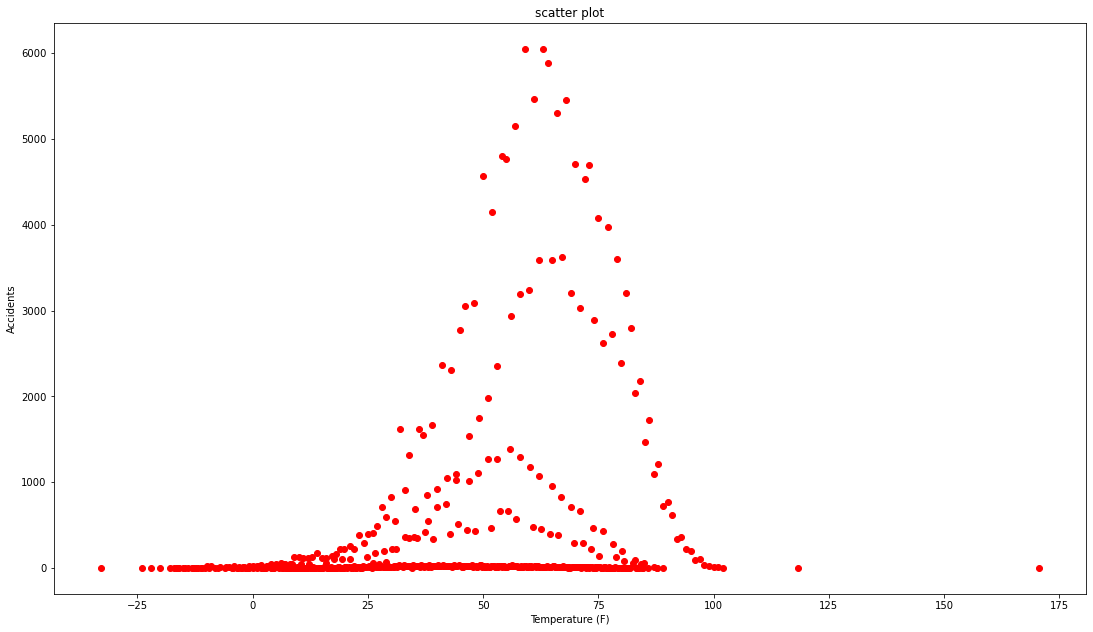

In [10]:
#plot scatter plot of #of accidents by temperature
fig, ax = plt.subplots()
ax.scatter(accidents_vs_weather['Temperature(F)'], accidents_vs_weather['City'] , color='r')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Accidents')
ax.set_title('scatter plot')
fig.set_size_inches(18.5, 10.5)
plt.show()

In [11]:
# #turn precip column into series for hist
# precipitation = spring_accidents['Precipitation(in)']
# precipitation.head()

In [12]:
# #determine hist of precip
# plt.hist(precipitation, bins=50)
# plt.xlabel('Precipitation(in)')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

In [13]:
# #lots of 0's in previous hist. Filter DF so data is greater than 1(in)
# precipitation_adjust = spring_accidents[spring_accidents['Precipitation(in)'] > 1]
# len(precipitation_adjust)

In [14]:
# #reset variable for hist. based on new df
# precip_hist = precipitation_adjust['Precipitation(in)']
# precipitation.head()

# #plot new hist using new df (filtered for precip above 1)
# plt.hist(precip_hist, bins=50)
# plt.xlabel('Precipitation(in)')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

# #determine measures of data
# mean = precipitation_adjust['Precipitation(in)'].mean()
# median = precipitation_adjust['Precipitation(in)'].median()
# mode = precipitation_adjust['Precipitation(in)'].mode()
# print(f'Mean: {mean}')
# print(f'Median: {median}')
# print(f'Mode: {mode}')

In [15]:
# #lets see the precip over a scatterplot by lat/long and with color variance! 
# #(too much of 0 in first df, using second df for more variance)
# plt.scatter(spring_accidents['Start_Lat'], spring_accidents['Start_Lng'], c = spring_accidents['Temperature(F)'])
# clb = plt.colorbar()
# plt.xlabel('Start_Lng')
# plt.ylabel('Start_Lat')
# clb.set_label('Temperature(F)')
# plt.show()

In [1]:
#call on summer accident file
file_path3 = 'summer_accidents.csv'

summer_accidents = pd.read_csv(file_path3)
summer_accidents.head()

NameError: name 'pd' is not defined

In [16]:
#use for seasons not for weather conditions, unless we want to group categories (which we don't)
pie_labels = spring_accidents['Weather_Condition'].dropna().unique()
weather_counts = spring_accidents['Weather_Condition'].value_counts()
pie_labels = list(pie_labels)
weather_counts = list(weather_counts)

In [17]:
label = [pie_labels]
totals = [weather_counts]
colors = ["yellow", "green", "lightblue", "orange", "red",
          "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]

<ipython-input-19-c72b6fd6bb98>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(totals, labels = pie_labels,


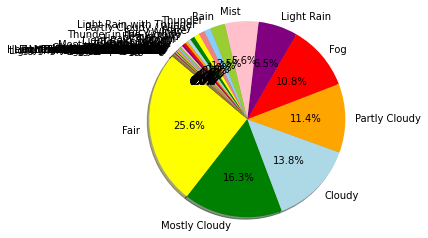

<Figure size 7200x7200 with 0 Axes>

In [19]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(totals, labels = pie_labels, 
        colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#print the final product to the screen
fig = plt.figure(figsize=(100,100))
plt.show()